<a href="https://colab.research.google.com/github/SeunghyeChae/CAKD3_tmdhey/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%94%A5%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


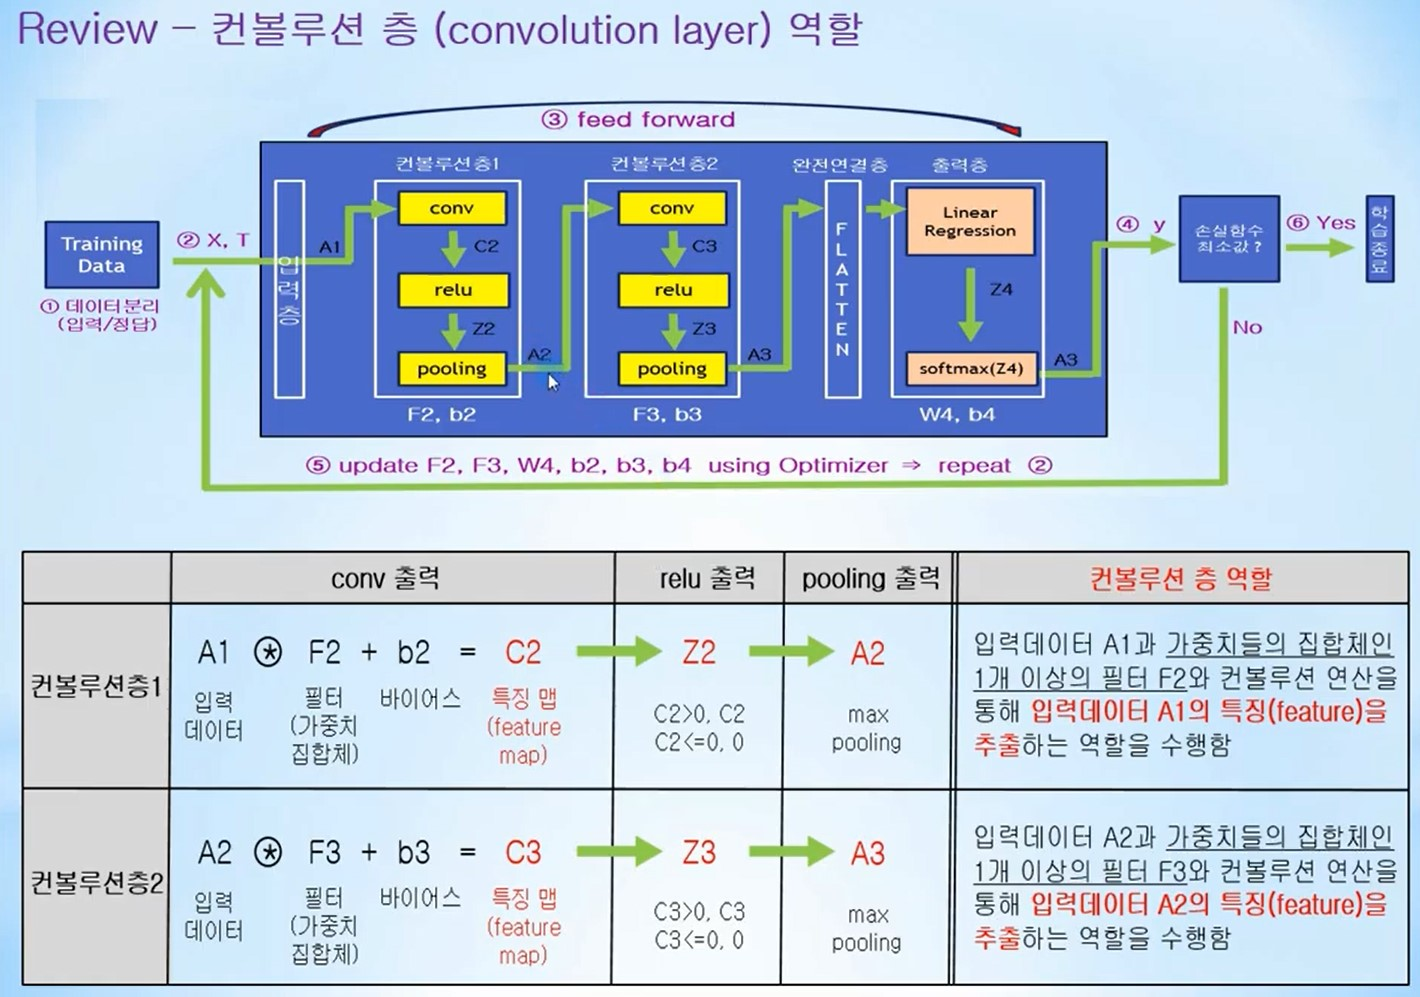

In [ ]:
from IPython.display import Image
Image("/content/drive/MyDrive/cakd_colab/dl_keras/datasets/cnn.jpg")

In [ ]:
# 공간에 대한 정보는 한번에 처리하기 어려워서
# 나눠서 처리해줌 - 컨볼루션 

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model  = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',input_shape=(28,28,1)))   # 3x3 크기의 필터 32개
model.add(layers.MaxPooling2D((2,2))) # 차원축소 효과
model.add(layers.Conv2D(64,(3,3), activation='relu'))   
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [ ]:
model.summary()

# (28,28,1) 크기의 특성맵을 입력으로 받아 (26,26,32) 크기의 특성맵 출력
# 입력에 대해 32개의 필터를 적용하고 32개의 출력 채널 각각은  26*26 크기의 배열값을 가진다
# 특성 맵의 출력 깊이는 합성곱으로 계산할 필터의 수이며 32로 시작해서 64로 끝났다.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [ ]:
# 피쳐 벡터화
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels),(test_images,test_labels)= mnist.load_data()

train_images = train_images.reshape(60000,28,28,1)
train_images = train_images.astype('float32')/255    # 0과 1 사이 값을 가지는 float타입으로 변환

test_images = test_images.reshape(10000,28,28,1)
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels= to_categorical(test_labels)

model.compile(optimizer = 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 20s 4ms/step - loss: 0.1857 - accuracy: 0.9421
Epoch 2/5
938/938 [==============================] - 3s 4ms/step - loss: 0.0499 - accuracy: 0.9845
Epoch 3/5
938/938 [==============================] - 4s 4ms/step - loss: 0.0337 - accuracy: 0.9895
Epoch 4/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0251 - accuracy: 0.9922
Epoch 5/5
938/938 [==============================] - 3s 3ms/step - loss: 0.0208 - accuracy: 0.9933


In [ ]:
test_loss,test_acc = model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9897


In [ ]:
test_acc

0.9897000193595886